# Practical Lab - 1 : 
# Univariate Linear Regression on the California Housing Prices Dataset
## Submitted by - Athul Raj
## Student ID - 8955725

# 1. Introduction:-

#### In this report we have trained three different models on linear regression tp predict the house values which will be the dependent value through out the model development and processing, along with three independent values like median income, population and number of households. The prime objective is to understand each of the variables' influence on the house prices. The report also puts lights upon the efficiency of model's predictive qualities.


# 2. Data Exploration:-

#### The dataset for the california Housing data can be downloaded from the below given hyperlink :-
#### Download the data from [California housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

#### The following python libraries has been used in the analysis and development of the models to develop a good system for identifying the najor contributor in house prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
## To read the data from the downloaded csv

housing = pd.read_csv('C:/Users/athul/Documents/aiml2024/Data/housing.csv')
housing.head()  # this will give us few rows with the columns in the data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2.1 Explore statistics:-
#### As a part of data exploration the first step is to describe the data using the below code. This will give us a summary on the statistical properties like mean , standard deviation of the data.

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2.2  Plotting - As a part of the exploration the variables will be analysed using plots, in this case we are using scatter plots

### 2.2.1 Scatter plot for the Median Income:-
#### In this the plotting is done between median house value with the independent variable "median income"

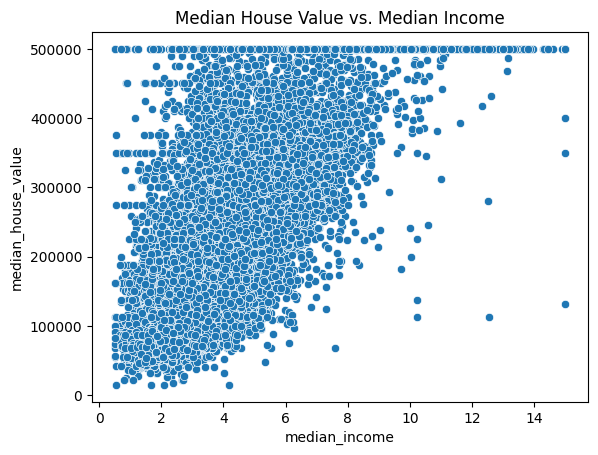

In [4]:
# Scatter plot: Median House Value vs. median income
sns.scatterplot(x='median_income', y='median_house_value', data=housing) #This function builds the scatter plot on axis x we have the independent variable 'median income' and 
                                                                        #on the axis y we have the dependent variable 'median house value'
plt.title('Median House Value vs. Median Income')
plt.show()

#### The below piece of code is used to represent the same data into histogram and joined with scatterplot

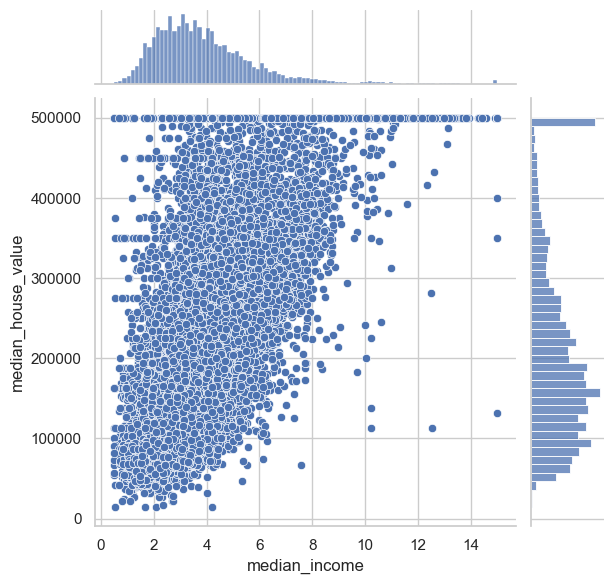

In [5]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing)

### 2.2.2 Scatter plot for the population:-
#### In this the plotting is done between median house value with the independent variable "population"

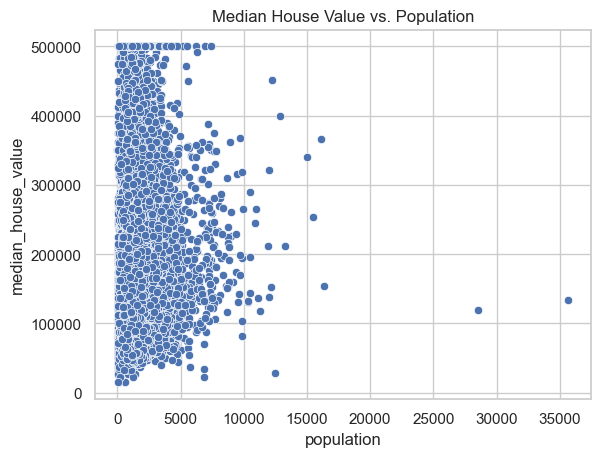

In [6]:
# Scatter plot: Median House Value vs. Population
sns.scatterplot(x='population', y='median_house_value', data=housing)
plt.title('Median House Value vs. Population')
plt.show()

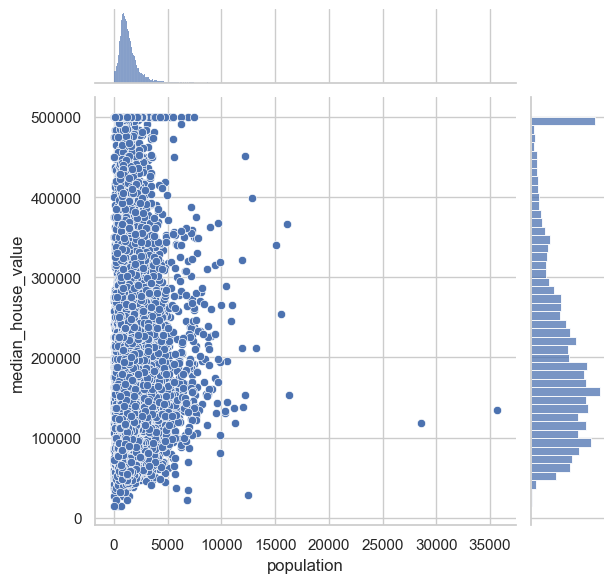

In [7]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=housing)

### 2.2.3 Scatter plot for the number of households:-
#### In this the plotting is done between median house value with the independent variable "households"

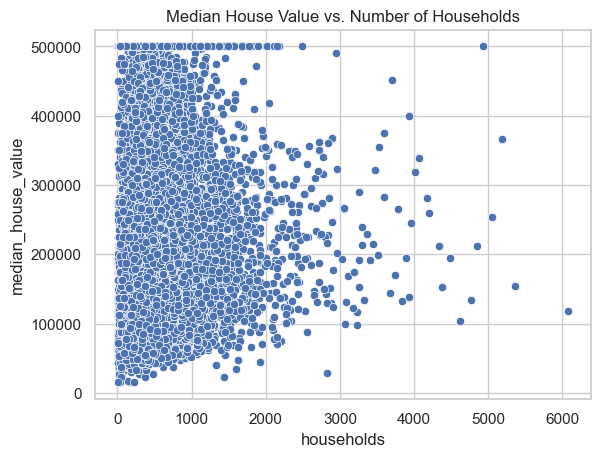

In [8]:
# Scatter plot: Median House Value vs. Number of Households
sns.scatterplot(x='households', y='median_house_value', data=housing)
plt.title('Median House Value vs. Number of Households')
plt.show()

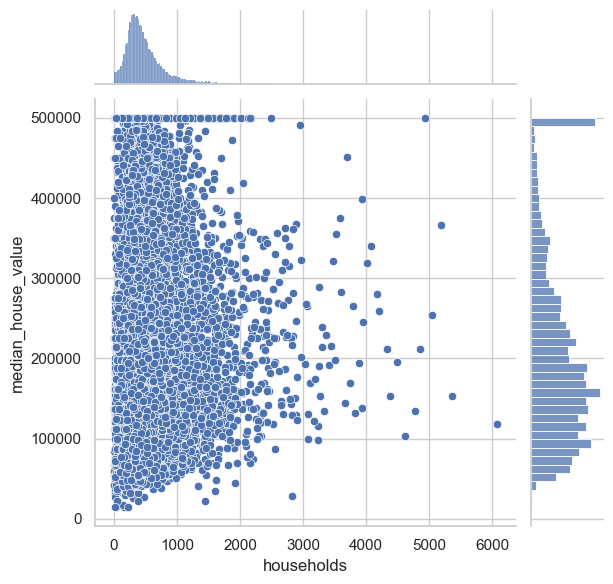

In [9]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=housing)

# 3. Data preprocessing:-

#### For data pre processing we have made sure that the values above 50000 are omitted as in the previous plots it was evident that the plotting was not efficient with those number and it didnt help much with the analysis

In [10]:
housing_preprocessed = housing[housing.median_house_value != 500001]  # Omitting the numbers above 50000

In [11]:
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")  # Just showing number of records 

After filtering, there are 19675 records, versus 20640 before filtering


#### Once all the unwanted data is removed then again we will create the plots 

#### For the median house values with the independent values (median income, population and households) after processing the data.
#### 1. In the first graph, between median income and median house value its shows a positive correlation. As the graph indicates there is growth in the income of the families and thus affecting to the prices of the houses as well. This will fit the data well into the model and will be good predictor.
#### 2. In the second graph, between population and median household value its correlation is weak. As the plots are towards the housing values and not much towards the population data points.
#### 3. In the third graph, between households and median house value the correlation is weak. The factors like MSE and MAE will be higher in values hence pointing to the poor predictive qualities.

Text(0.5, 1.03, 'Households vs. Median House Value')

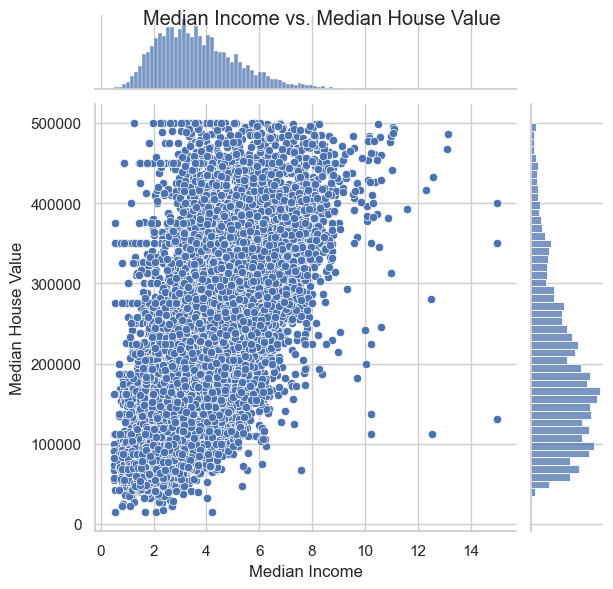

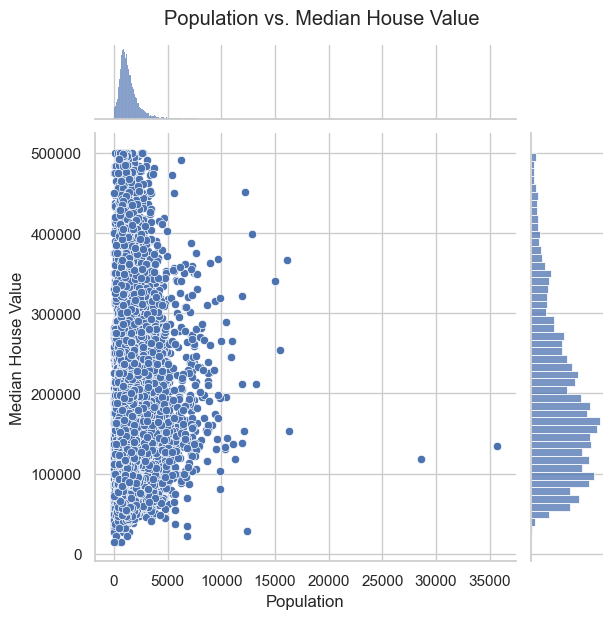

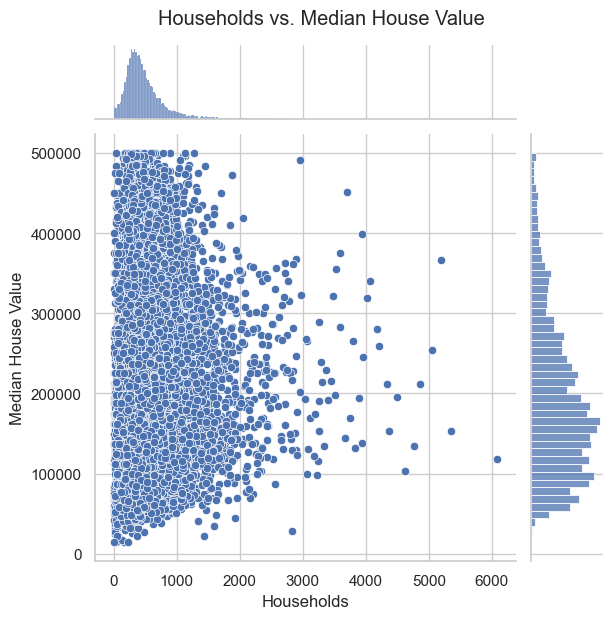

In [12]:
sns.set(style="whitegrid", color_codes=True)

# Jointplot for median_income vs. median_house_value
joint1 = sns.jointplot(x="median_income", y="median_house_value", data=housing_preprocessed)
joint1.set_axis_labels("Median Income", "Median House Value")
joint1.fig.suptitle("Median Income vs. Median House Value")

# Jointplot for population vs. median_house_value
joint2 = sns.jointplot(x="population", y="median_house_value", data=housing_preprocessed)
joint2.set_axis_labels("Population", "Median House Value")
joint2.fig.suptitle("Population vs. Median House Value", y=1.03)

# Jointplot for households vs. median_house_value
joint3 = sns.jointplot(x="households", y="median_house_value", data=housing_preprocessed)
joint3.set_axis_labels("Households", "Median House Value")
joint3.fig.suptitle("Households vs. Median House Value", y=1.03)


# 4. Modeling:-

#### We have deployed univariate linear regression, to understand the relationship between independent variables to dependent variables. The model will present with a straight line through the data points to predict the median house values. Through this model we can identify the factors towards the prices of housing and the major factors behind them.

In [13]:
train_size = int(len(housing_preprocessed) * 0.8) # we will be using 80% of the data
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

#### The red color is for the test data and the blue represents the train data 

Text(0.5, 1.0, 'Median House Value vs. median income')

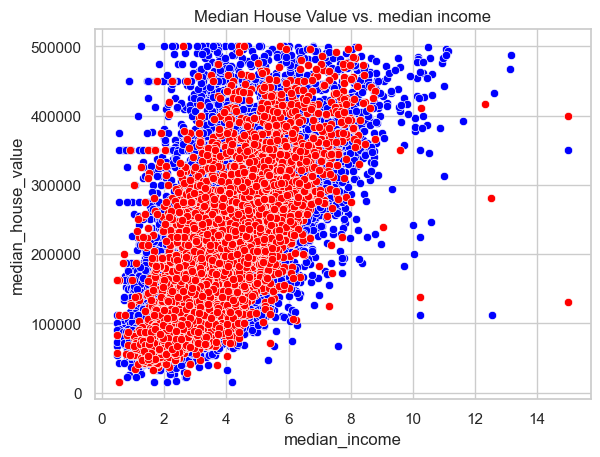

In [14]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.title('Median House Value vs. median income')

Text(0.5, 1.0, 'Median House Value vs. Population')

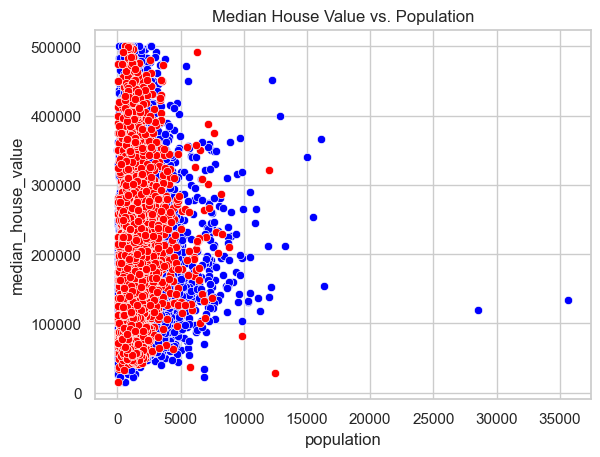

In [15]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")
plt.title('Median House Value vs. Population')

Text(0.5, 1.0, 'Median House Value vs. Households')

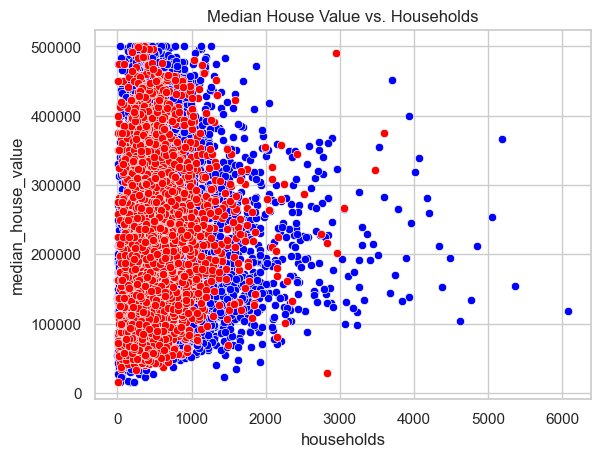

In [16]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")
plt.title('Median House Value vs. Households')

# 5. Evaluation of the models:-

In [17]:
model_income = linear_model.LinearRegression()
model_population = linear_model.LinearRegression()
model_households = linear_model.LinearRegression()

### Median Income:-
#### 1. The slope of 38702.97 indicates increase in every unit of the median income will be incresing the value of median house values.
#### 2. The relatively low MSE and MAE is a good fit for the linear regression mode.

In [23]:
# Median Income vs Median House Value
model_income = linear_model.LinearRegression()

# Fit the model
model_income.fit(X=train[["median_income"]], y=train[["median_house_value"]])

# Predict on the test set
pred_income = model_income.predict(test[["median_income"]])

# Calculate metrics
intercept_income = model_income.intercept_[0]
slope_income = model_income.coef_[0][0]
mse_income = mean_squared_error(test[["median_house_value"]], pred_income)
mae_income = mean_absolute_error(test[["median_house_value"]], pred_income)

# Display results
print(f"Median Income Model:\nIntercept: {intercept_income}, \nSlope: {slope_income}")
print(f"Mean Squared Error: {mse_income}, \nMean Absolute Error: {mae_income}")


Median Income Model:
Intercept: 48204.534368169785, 
Slope: 38702.97233842378
Mean Squared Error: 5831038297.419372, 
Mean Absolute Error: 59961.60099129183


## Population:-
#### 1. The slope in the population variable is very weak with the just 0.33 for every person increase, which is not a good indicator.
#### 2. The higher MSE and MAE compared to the Median Income Model suggest that this model does not fit the data as well. The weak correlation implies that population is not a strong predictor of median house value.

In [19]:
# Population vs Median House Value
model_population = linear_model.LinearRegression()

# Fit the model
model_population.fit(X=train[["population"]], y=train[["median_house_value"]])

# Predict on the test set
pred_population = model_population.predict(test[["population"]])

# Calculate metrics
intercept_population = model_population.intercept_[0]
slope_population = model_population.coef_[0][0]
mse_population = mean_squared_error(test[["median_house_value"]], pred_population)
mae_population = mean_absolute_error(test[["median_house_value"]], pred_population)

# Display results
print(f"Population Model:\nIntercept: {intercept_population}, \nSlope: {slope_population}")
print(f"Mean Squared Error: {mse_population}, \nMean Absolute Error: {mae_population}")


Population Model:
Intercept: 188081.58862583563, 
Slope: 0.3286297271249774
Mean Squared Error: 10863782849.78328, 
Mean Absolute Error: 85178.9089807831


## Households:-
#### 1. Once again the slope of 22.62 indicates the in crease in every household will be increase the house value by 22.62. Its not a good indicator for the model.
#### 2. The MSE and MAE values, similar to the Population Model, indicate that this model also does not fit the data well, and the number of households is not a strong predictor of median house value.

In [20]:
# Households vs Median House Value
model_households = linear_model.LinearRegression()

# Fit the model
model_households.fit(X=train[["households"]], y=train[["median_house_value"]])

# Predict on the test set
pred_households = model_households.predict(test[["households"]])

# Calculate metrics
intercept_households = model_households.intercept_[0]
slope_households = model_households.coef_[0][0]
mse_households = mean_squared_error(test[["median_house_value"]], pred_households)
mae_households = mean_absolute_error(test[["median_house_value"]], pred_households)

# Display results
print(f"Households Model:\nIntercept: {intercept_households}, \nSlope: {slope_households}")
print(f"Mean Squared Error: {mse_households}, \nMean Absolute Error: {mae_households}")


Households Model:
Intercept: 177147.28853834848, 
Slope: 22.625725908661156
Mean Squared Error: 10759278800.526697, 
Mean Absolute Error: 84503.1472350856


## Regression line on the scatter plot

### For median income:-
#### As in the below developed plots it is visible that the regression line is passing through the close proximity of the data points. It is a clear indication that the price of house increase with the increase in income.

### Training data

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- households
- population


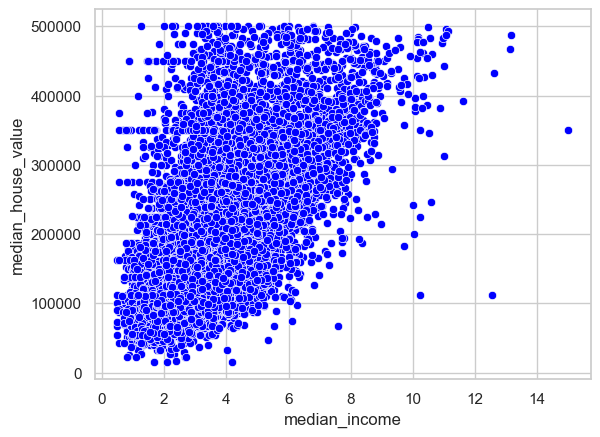

In [21]:
# Plot the training data scatter and regression line
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")

# Plot the regression line (predicted values from the model for training data)
plt.plot(train["median_income"], model_income.predict(train[["median_income"]]), color="black")

# Add title and labels
plt.title('Regression Line on Training Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### Test Data

C:\Users\athul\AppData\Local\Temp\ipykernel_26408\1364927479.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


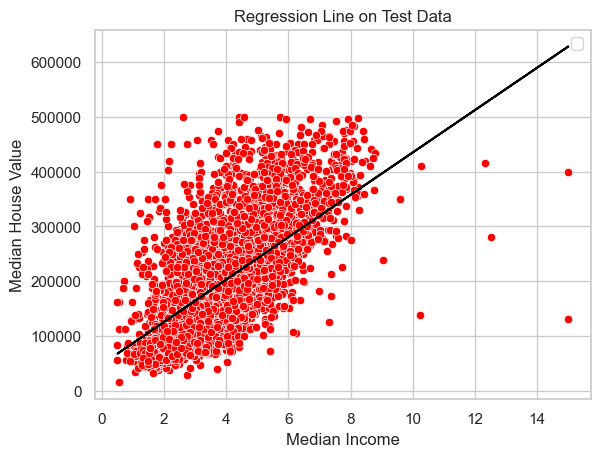

In [83]:
# Plot the test data scatter and regression line
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

# Plot the regression line (predicted values from the model for test data)
plt.plot(test["median_income"], model_income.predict(test[["median_income"]]), color="black")

# Add title and labels
plt.title('Regression Line on Test Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### For population:-
#### The line of linear regression is a clear indication that it is not in the direction of data points as the area covering the line is small and it shows that increase in population is not a factor in house value. But in the test data there are few data points towards the population side, so the outside factors also matter.

### Training data

C:\Users\athul\AppData\Local\Temp\ipykernel_26408\3899732811.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


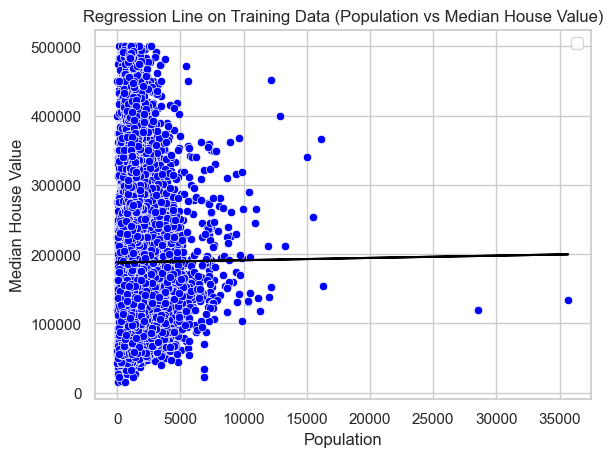

In [84]:
# Plot the training data scatter and regression line for Population
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")

# Plot the regression line (predicted values from the model for training data)
plt.plot(train["population"], model_population.predict(train[["population"]]), color="black")

# Add title and labels
plt.title('Regression Line on Training Data (Population vs Median House Value)')
plt.xlabel('Population')
plt.ylabel('Median House Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### Test data

C:\Users\athul\AppData\Local\Temp\ipykernel_26408\1632439524.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


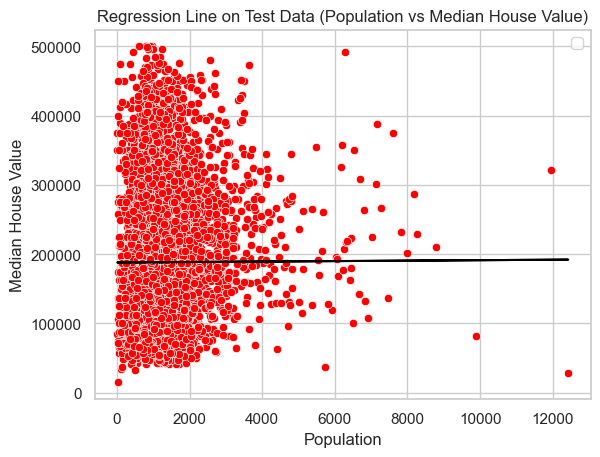

In [85]:
# Plot the test data scatter and regression line for Population
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

# Plot the regression line (predicted values from the model for test data)
plt.plot(test["population"], model_population.predict(test[["population"]]), color="black")

# Add title and labels
plt.title('Regression Line on Test Data (Population vs Median House Value)')
plt.xlabel('Population')
plt.ylabel('Median House Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### For households:-
#### The household prices are in line with the linear regression but not as strong as the median income and thus its not a good fit. It is hard to decide on the basis of few factors alone.

### Training data

C:\Users\athul\AppData\Local\Temp\ipykernel_26408\3180847875.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


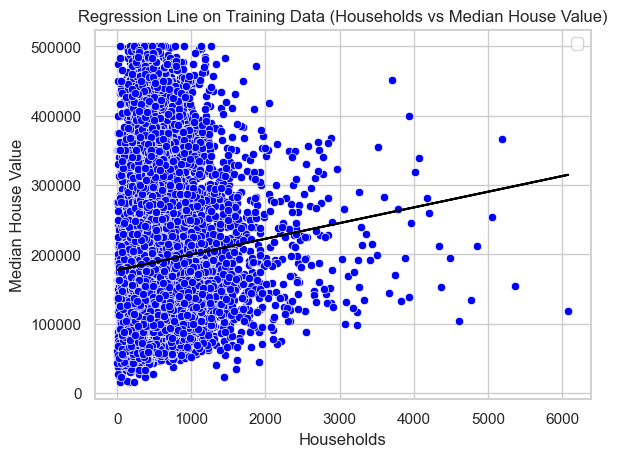

In [86]:
# Plot the training data scatter and regression line for Households
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")

# Plot the regression line (predicted values from the model for training data)
plt.plot(train["households"], model_households.predict(train[["households"]]), color="black")

# Add title and labels
plt.title('Regression Line on Training Data (Households vs Median House Value)')
plt.xlabel('Households')
plt.ylabel('Median House Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()


### Test data

C:\Users\athul\AppData\Local\Temp\ipykernel_26408\3743499697.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


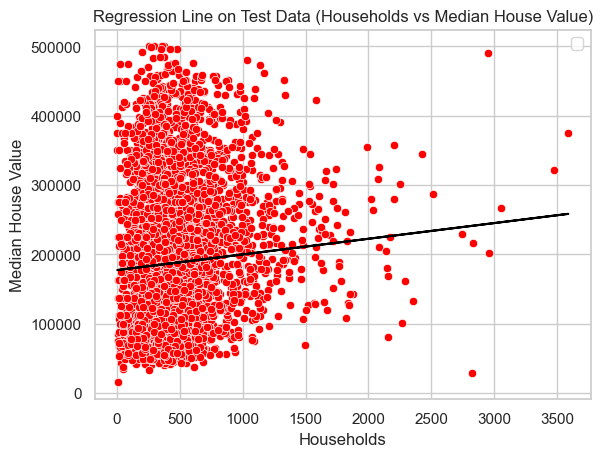

In [87]:
# Plot the test data scatter and regression line for Households
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")

# Plot the regression line (predicted values from the model for test data)
plt.plot(test["households"], model_households.predict(test[["households"]]), color="black")

# Add title and labels
plt.title('Regression Line on Test Data (Households vs Median House Value)')
plt.xlabel('Households')
plt.ylabel('Median House Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# 6. Summary:-

#### Overall the median income proves to be a strong predictor for the median house values with low errors (MSE and MAE). Teh strong linear regression also proves to be another point to conclude with median income. The other two variables are not up to the point to individually prove the fit. For both population and households other factors comes into the picture as they were not capable to capture all the nuances.